In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Question 1
### 1.1) Generating 400 different points from the distributions

In [23]:
dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=400)
dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=400)
combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]
train_set = np.array([(x,y) for x,y,label in combined])
train_label = np.array([label for x,y,label in combined])

### 1.2) Plotting the samples

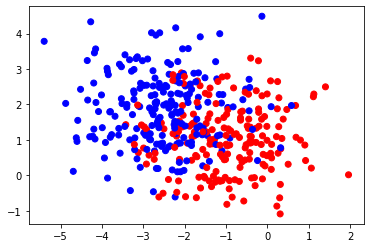

In [24]:
x,y = train_set.T
colormap = np.array(['r', 'b'])
plt.scatter(x,y, c=colormap[train_label])
plt.show()

### 1.3) Generating the test set and plotting 

In [25]:
dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=100)
dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=100)
combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]
test_set = np.array([(x,y) for x,y,label in combined])
test_label = np.array([label for x,y,label in combined])

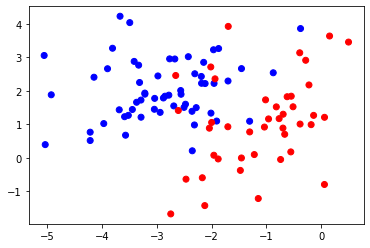

In [26]:
x,y = test_set.T
colormap = np.array(['r', 'b'])
plt.scatter(x,y, c=colormap[test_label])
plt.show()

### 1.4) Classifing the test set using KNN classifier

In [27]:
classifier = KNeighborsClassifier(1)
classifier.fit(train_set,train_label)
predictions = classifier.predict(test_set)
error_rate = sum(np.add(predictions,test_label) == 1)/len(predictions)
error_rate

0.24

In [28]:
classifier = KNeighborsClassifier(1)
classifier.fit(train_set,train_label)
predictions = classifier.predict(train_set)
error_rate = sum(np.add(predictions,train_label) == 1)/len(predictions)
error_rate

0.0

##### There is a relatively high difference in the error rates
The reason for that is that the model is overfitted for the training set. Since every sample is closest to itself, predicting the label for the train set is easy since that is what the model was trained at.
Finding the correct label for a new sample however, is not as accurate.

### 1.5) Testing the effectiveness of different K values for the test_set and train_set

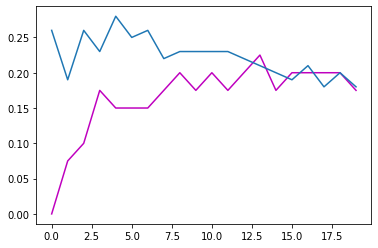

In [32]:
train_error = []
test_error = []
for i in range(1,21):
    classifier = KNeighborsClassifier(i)
    classifier.fit(train_set,train_label)
    predictions = classifier.predict(test_set)
    test_error.append(sum(np.add(predictions,test_label) == 1)/len(predictions))
    
    classifier = KNeighborsClassifier(i)
    classifier.fit(train_set,train_label)
    predictions = classifier.predict(train_set)
    train_error.append(sum(np.add(predictions,train_label) == 1)/len(predictions))

plt.plot(train_error,'m')
plt.plot(test_error)
plt.show()


###### Test_set error rate:
There is a slight decline in the error rate as K grows (It reaches the minimum value around K=9) and begins to rise for K>9.

The error rate for the test set isn't expected to decrease as K increases, an example of that is having unevenly distributed dataset, e.g: 
<br>
Let $\Sigma$ be a dataset $\Lambda$ be the label set, |$\Lambda$| = 2, let $\lambda_1,\lambda_2 \in \Lambda $ be the only labels in the label set, if the amount of elements of label $\lambda_1$ is much greater the those of $\lambda_2$ than having a large K will eventually start taking into consideration labels who should not have been taken into consideration when determining the label for a new element with a $\lambda_2$ true label


### 1.6) Trying different train sets

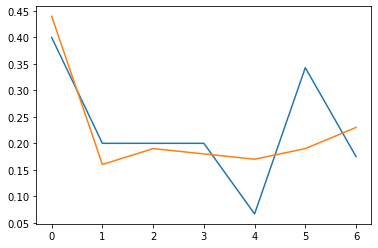

In [30]:
# Fixing K and Test set
K = 10
dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=100)
dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=100)
combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]
test_set = np.array([(x,y) for x,y,label in combined])
test_label = np.array([label for x,y,label in combined])

train_error = []
test_error = []

# Training set
for i in range(10,41,5):
    dataset1 = np.random.multivariate_normal([-1,1],np.eye(2,2),size=i)
    dataset2 = np.random.multivariate_normal([-2.5,2],np.eye(2,2),size=i)
    combined = [(x1,y1,0)if np.random.random() <= 0.5 else (x2,y2,1) for (x1,y1),(x2,y2) in zip(dataset1,dataset2)]
    train_set = np.array([(x,y) for x,y,label in combined])
    train_label = np.array([label for x,y,label in combined])

    #   Predicting using M_train_i
    classifier = KNeighborsClassifier(K)
    classifier.fit(train_set,train_label)
    predictions = classifier.predict(test_set)
    test_error.append(sum(np.add(predictions,test_label) == 1)/len(predictions))

    predictions = classifier.predict(train_set)
    train_error.append(sum(np.add(predictions,train_label) == 1)/len(predictions))

plt.plot(train_error)
plt.plot(test_error)
plt.show()